In [1]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso, RidgeClassifier, ElasticNet 
from sklearn.tree import DecisionTreeClassifier
#import xgboost

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data Preprocessing

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
pandas_profiling.ProfileReport(data)

In [5]:
data.duplicated().sum()

0

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.shape

(1470, 35)

In [8]:
data['Age'].isna().sum()

0

In [9]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [10]:
data.drop(columns='EmployeeCount',inplace=True)

In [11]:
data.shape

(1470, 34)

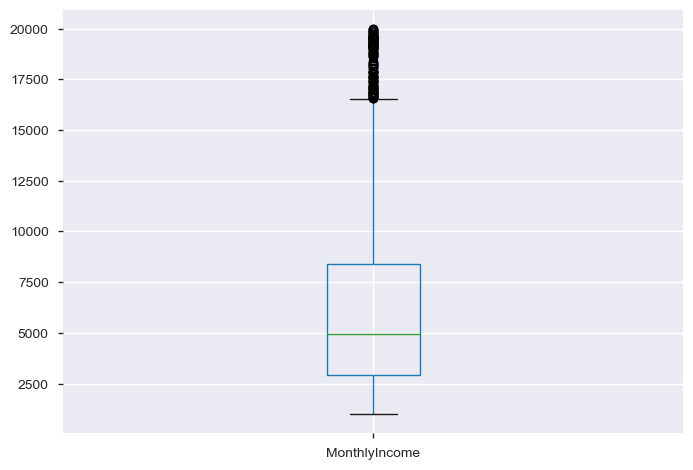

In [12]:
data['MonthlyIncome'].plot(kind='box')

In [13]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [14]:
data.drop(columns='Over18',inplace=True)

In [15]:
data.shape

(1470, 33)

In [16]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [17]:
data.drop(columns='StandardHours',inplace=True)

In [18]:
data.shape

(1470, 32)

In [19]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
data["Attrition"].replace({"Yes":1,"No":0}, inplace = True)

In [21]:
data['Attrition'].unique()

array([1, 0], dtype=int64)

In [22]:
data[data['Attrition'] == 0].shape

(1233, 32)

In [23]:
data[data['Attrition'] == 1].shape

(237, 32)

In [24]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [25]:
data['DailyRate'].isna().sum()

0

In [26]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [27]:
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [28]:
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [29]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [30]:
data['EmployeeNumber'].unique().shape

(1470,)

In [31]:
data.drop(columns='EmployeeNumber',inplace=True)

In [32]:
data['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

In [33]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
data['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [35]:
data['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [36]:
data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [37]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [38]:
data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [39]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [40]:
data['MonthlyIncome'].isna().sum()

0

In [41]:
data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [42]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
data['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [44]:
data['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [45]:
data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [46]:
data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [47]:
data['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [48]:
data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [49]:
data['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [50]:
data['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [51]:
data['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [52]:
data['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [53]:
data['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

## Exploratory Data Analysis

In [54]:
data.shape

(1470, 31)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

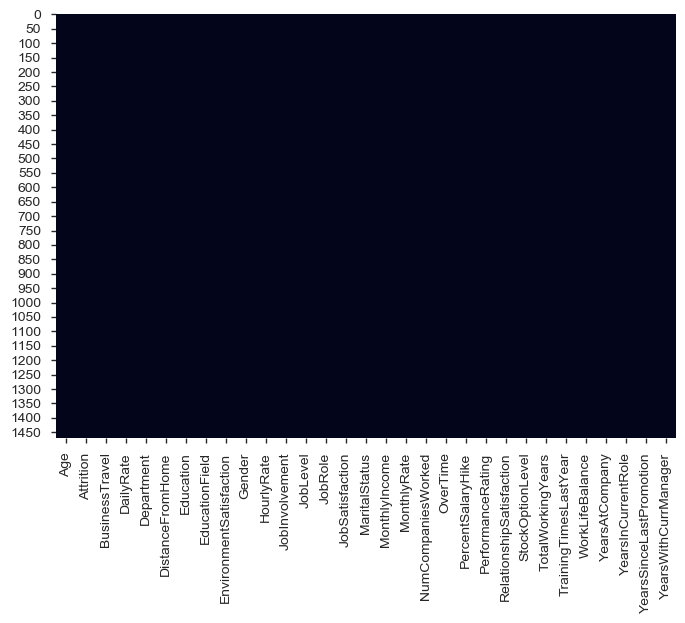

In [56]:
sns.heatmap(data.isnull(), cbar=False)

In [57]:
data.describe().T

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
Attrition                 1470.0      0.161224     0.367863     0.0     0.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

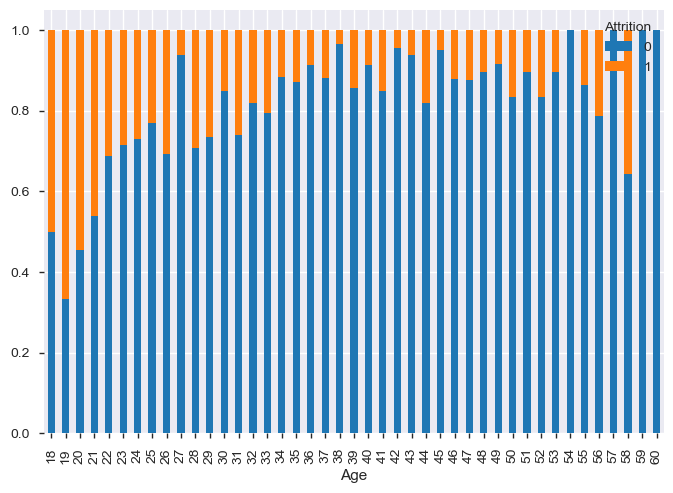

In [58]:
pd.crosstab(data["Age"],data["Attrition"]).div(pd.crosstab(data["Age"],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

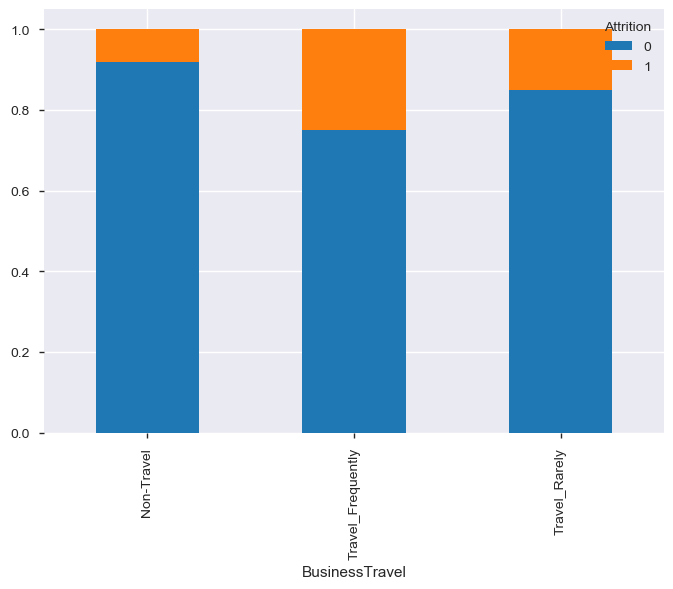

In [59]:
pd.crosstab(data["BusinessTravel"],data["Attrition"]).div(pd.crosstab(data["BusinessTravel"],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

In [60]:
##for i in data.columns.to_list():
    ##if i!='Attrition':
       ## pd.crosstab(data[i],data["Attrition"]).div(pd.crosstab(data[i],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

Text(0.5, 1.0, 'Percent Salary Hike Distribuition')

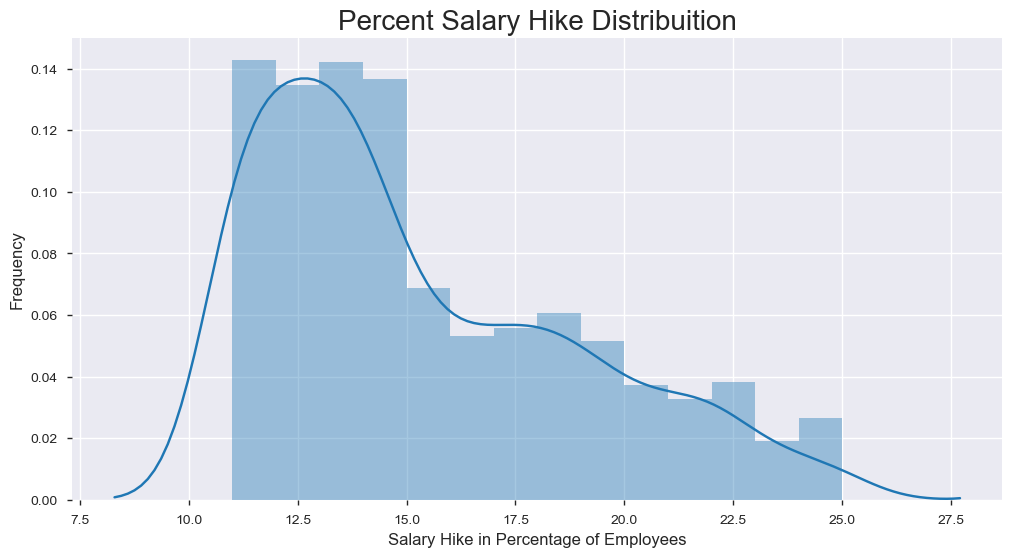

In [61]:
plt.figure(figsize=(12,6))
g = sns.distplot(data["PercentSalaryHike"])
g.set_xlabel("Salary Hike in Percentage of Employees", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Percent Salary Hike Distribuition", fontsize=20)

Text(0, 0.5, 'Monthly Income')

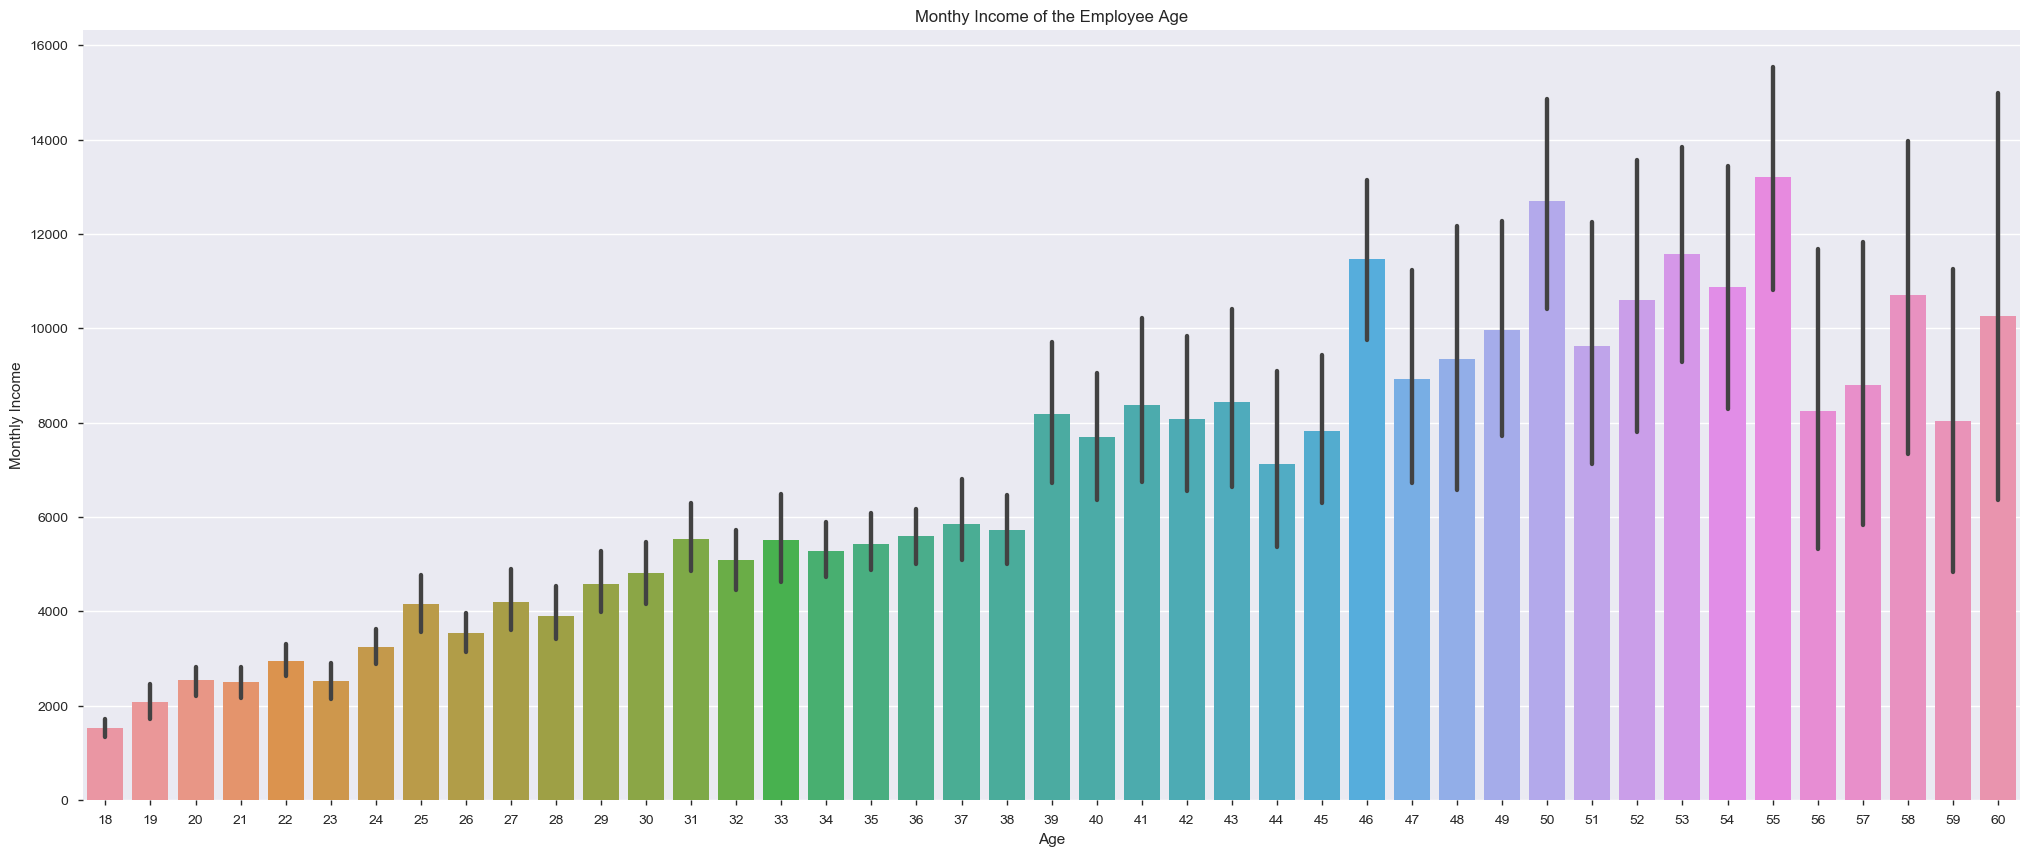

In [62]:
plt.figure(figsize=(25,10))
plt.title("Monthy Income of the Employee Age")
sns.barplot(x=data['Age'], y=data['MonthlyIncome'])

plt.ylabel("Monthly Income")

Text(0, 0.5, 'Monthly Income')

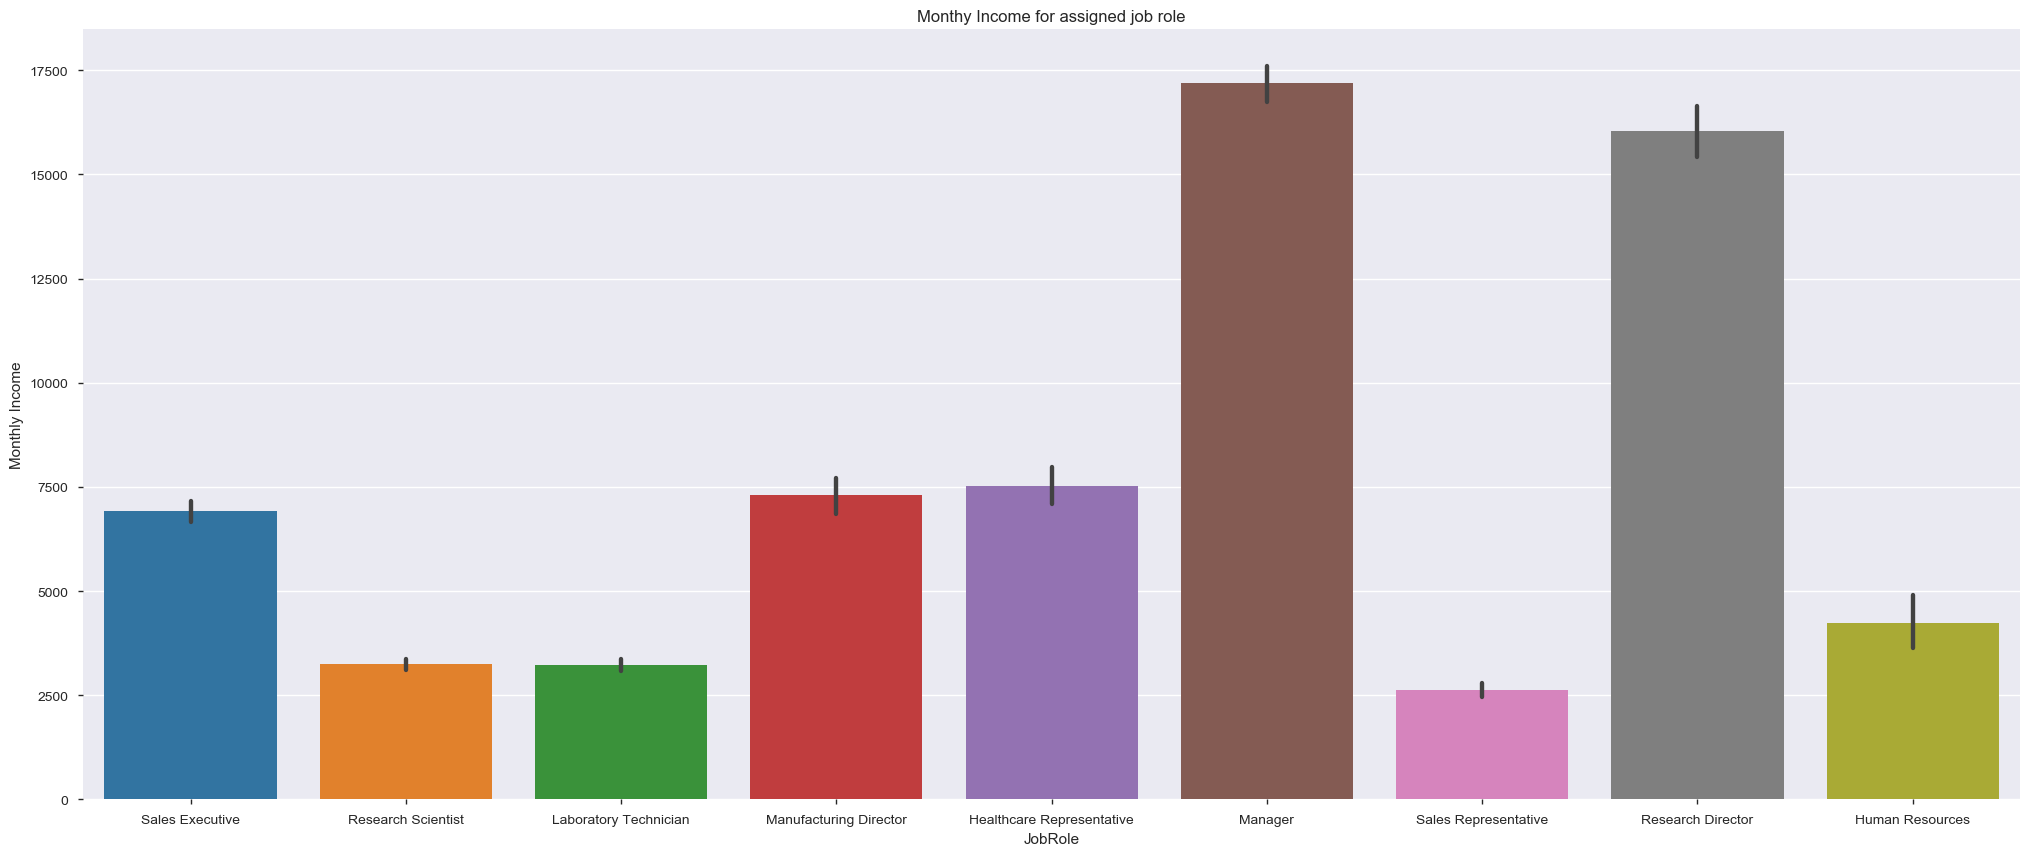

In [63]:
plt.figure(figsize=(25,10))
plt.title("Monthy Income for assigned job role")
sns.barplot(x=data['JobRole'], y=data['MonthlyIncome'])

plt.ylabel("Monthly Income")

Text(0, 0.5, 'Attrition')

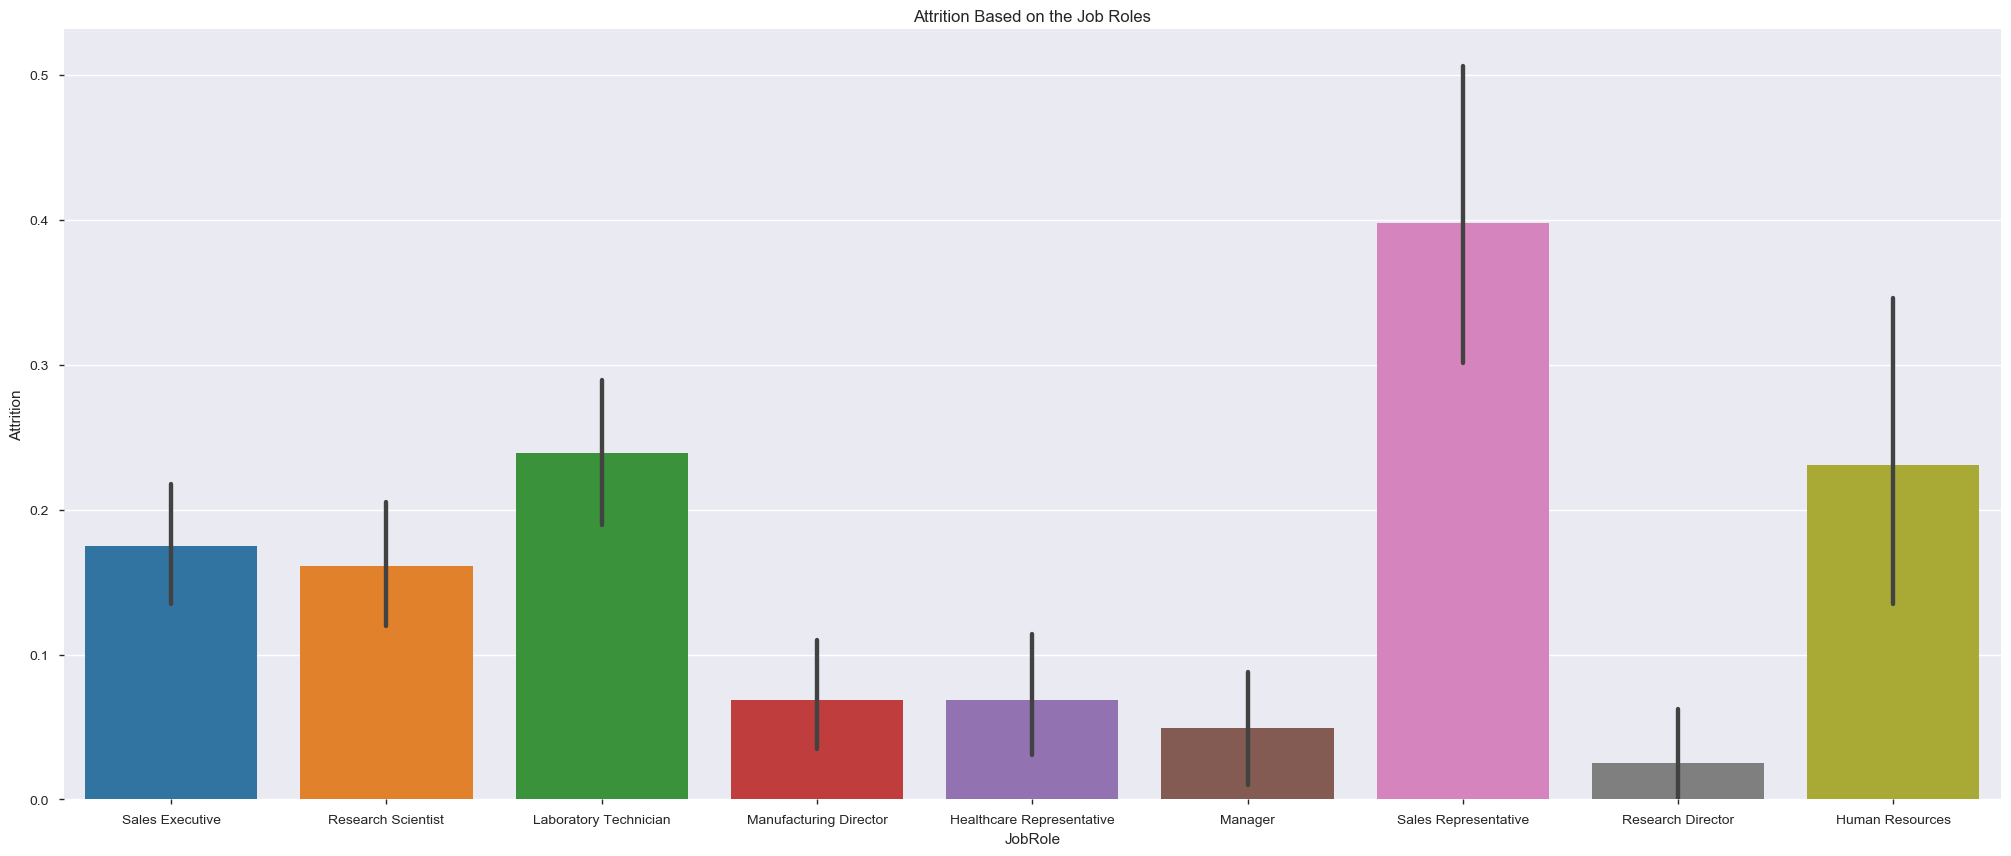

In [64]:
plt.figure(figsize=(25,10))
plt.title("Attrition Based on the Job Roles")
sns.barplot(x=data['JobRole'], y=data['Attrition'])

plt.ylabel("Attrition")

Text(0, 0.5, 'Attrition')

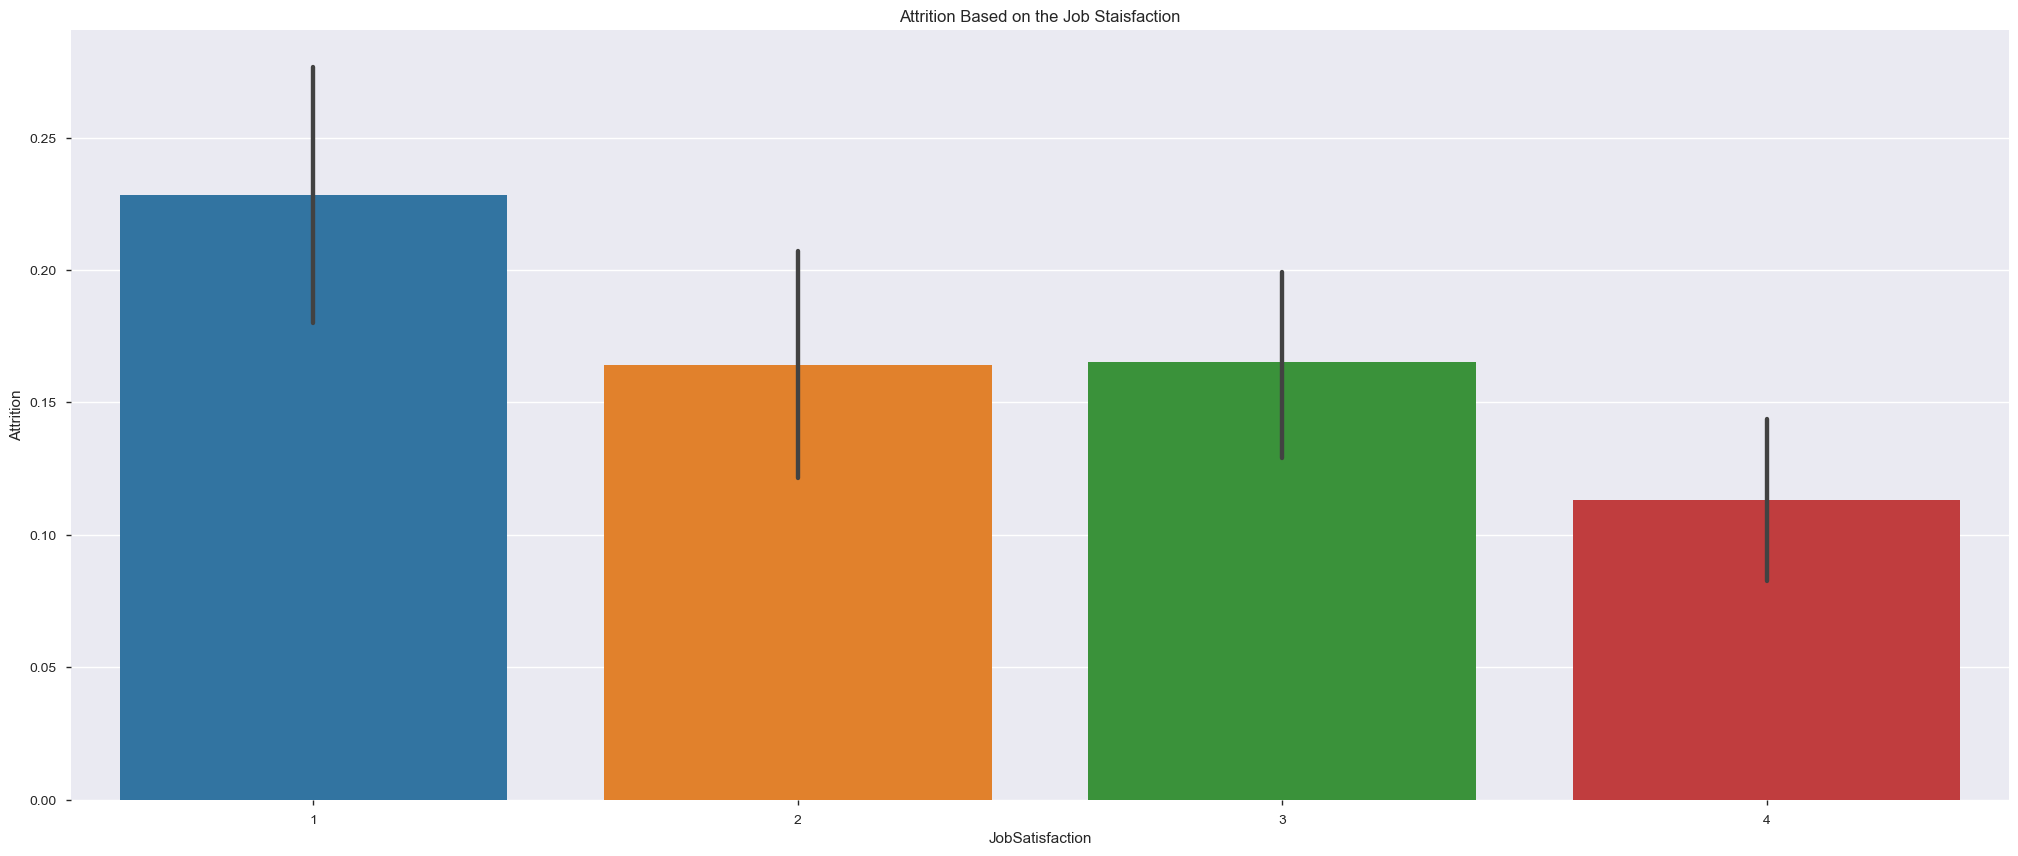

In [65]:
plt.figure(figsize=(25,10))
plt.title("Attrition Based on the Job Staisfaction")
sns.barplot(x=data['JobSatisfaction'], y=data['Attrition'])

plt.ylabel("Attrition")

Text(0, 0.5, 'JobSatisfaction')

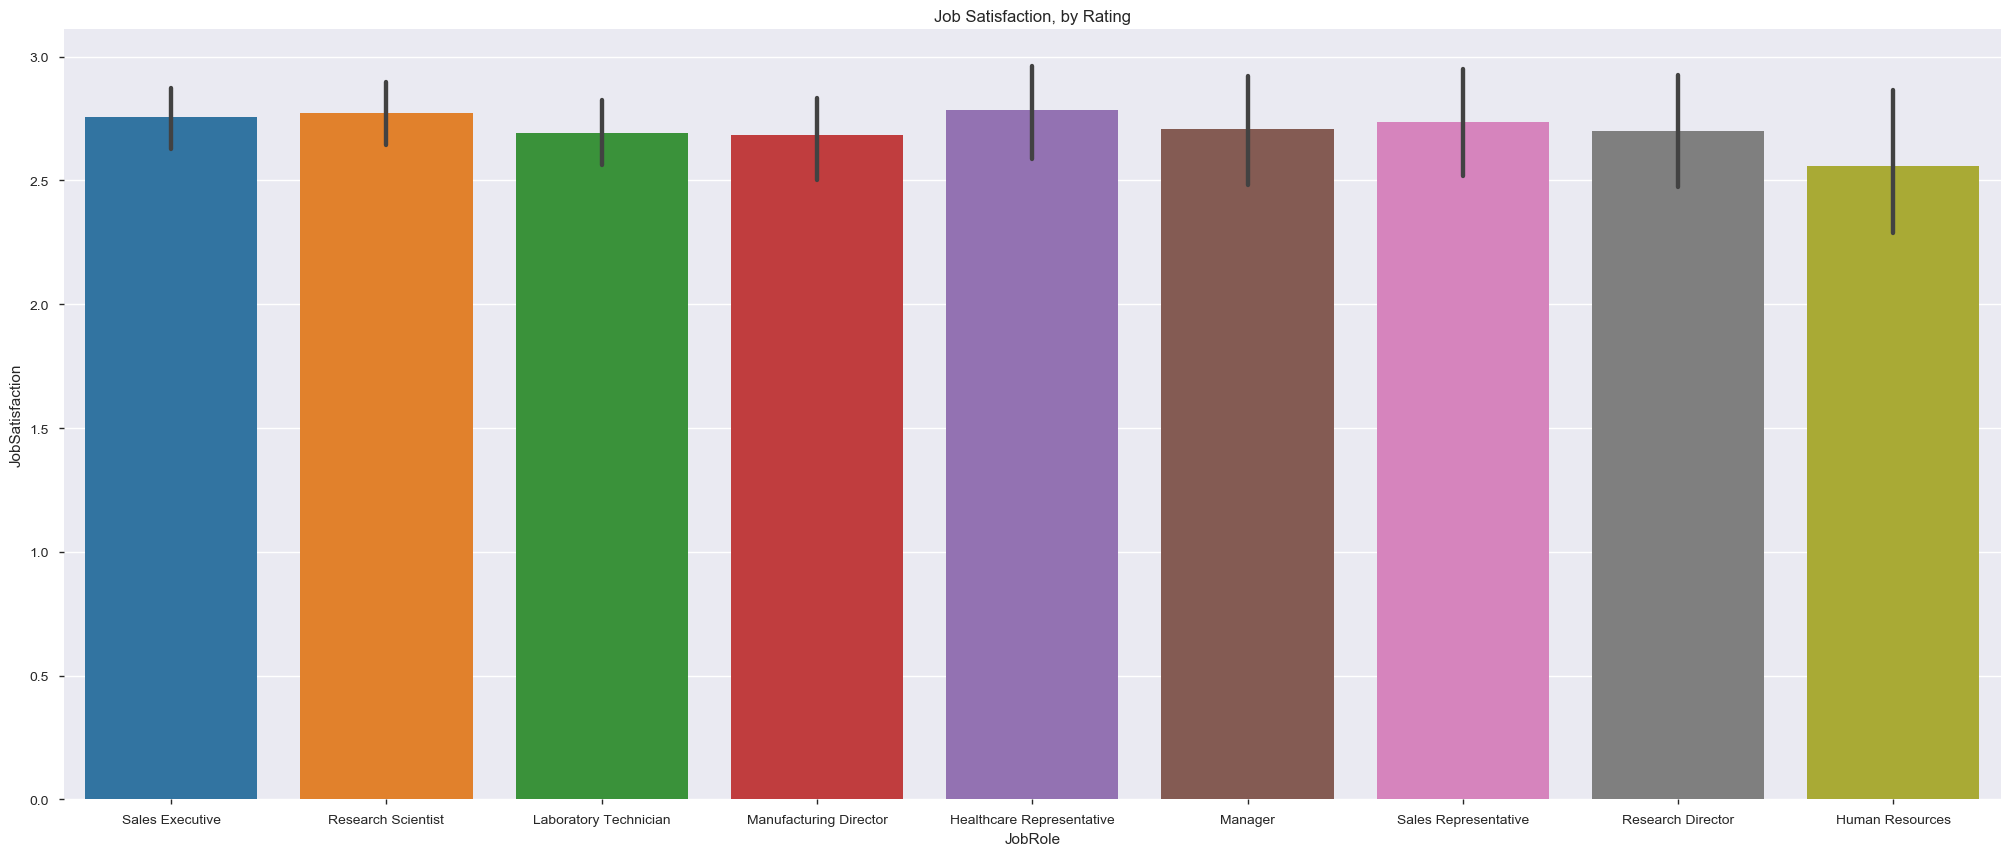

In [66]:
plt.figure(figsize=(25,10))
plt.title("Job Satisfaction, by Rating")
sns.barplot(x=data['JobRole'], y=data['JobSatisfaction'])

plt.ylabel("JobSatisfaction")

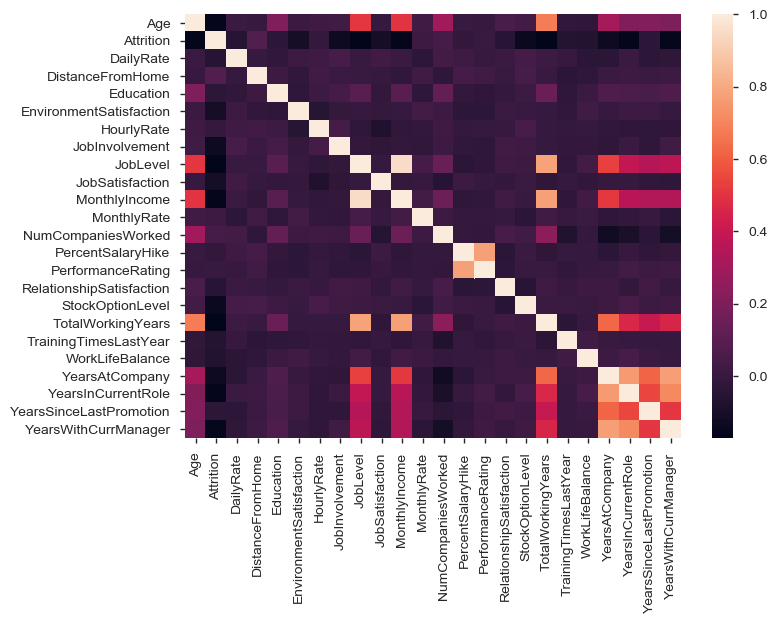

In [67]:
sns.heatmap(data.corr())

## Feature Engineering

In [68]:
encoded_data = pd.get_dummies(data.select_dtypes(exclude=np.number))

In [69]:
numeric_data = data.select_dtypes(include=np.number)

In [70]:
data_preprocessed = pd.concat([encoded_data,numeric_data],axis="columns")

In [71]:
x = data_preprocessed.drop(columns='Attrition')

In [72]:
y = data_preprocessed['Attrition']

In [73]:
pandas_profiling.ProfileReport(data)

## Modeling

In [74]:
def roc_draw(x_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [75]:
Train_accuracy = []
Test_accuracy = []
AlgorthimName = [];
def model_fit(model,x_train,x_test,y_train,y_test,algorthimName):
    model.fit(x_train,y_train)
    y_train_predicted = model.predict(x_train);
    y_test_predicted = model.predict(x_test);
    print(" Train Accuracy :",accuracy_score(y_train,y_train_predicted))
    print(" Test Accuracy :",accuracy_score(y_test,y_test_predicted))
    Train_accuracy.append(accuracy_score(y_train,y_train_predicted))
    Test_accuracy.append(accuracy_score(y_test,y_test_predicted))
    AlgorthimName.append(algorthimName)

In [76]:
logistic = LogisticRegression()

In [77]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(x)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.3, random_state = 0)

In [79]:
model_fit(logistic,x_train,x_test,y_train,y_test,'LogisticRegression')

 Train Accuracy : 0.8931000971817298
 Test Accuracy : 0.8934240362811792


C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
knn = KNeighborsClassifier()
model_fit(knn,x_train,x_test,y_train,y_test,'KNeighborsClassifier')

 Train Accuracy : 0.86977648202138
 Test Accuracy : 0.8480725623582767


In [81]:
bnb = BernoulliNB()
model_fit(bnb,x_train,x_test,y_train,y_test,'BernoulliNB')

 Train Accuracy : 0.8629737609329446
 Test Accuracy : 0.8616780045351474


In [82]:
nb = GaussianNB()
model_fit(bnb,x_train,x_test,y_train,y_test,'GaussianNB')

 Train Accuracy : 0.8629737609329446
 Test Accuracy : 0.8616780045351474


In [83]:
lasso = LogisticRegression(penalty="l2")
model_fit(lasso,x_train,x_test,y_train,y_test,'Lasso')

 Train Accuracy : 0.8931000971817298
 Test Accuracy : 0.8934240362811792


C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
ridge = RidgeClassifier()
model_fit(ridge,x_train,x_test,y_train,y_test,'Ridge')

 Train Accuracy : 0.8707482993197279
 Test Accuracy : 0.8639455782312925


In [85]:
ridge = RidgeClassifier()
model_fit(ridge,x_train,x_test,y_train,y_test,'Ridge')

 Train Accuracy : 0.8707482993197279
 Test Accuracy : 0.8639455782312925


In [86]:
dt_gini = DecisionTreeClassifier(criterion="gini")
model_fit(dt_gini,x_train,x_test,y_train,y_test,'DecisionTreeClassifier_Gini')

 Train Accuracy : 1.0
 Test Accuracy : 0.7845804988662132


In [87]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
model_fit(dt_entropy,x_train,x_test,y_train,y_test,'DecisionTreeClassifier_Entropy')

 Train Accuracy : 1.0
 Test Accuracy : 0.7913832199546486


In [88]:
##knn = KNeighborsClassifier(n_neighbors=5)
##model_fit(knn,x_train,x_test,y_train,y_test)

In [89]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1.0,)
model_fit(ada,x_train,x_test,y_train,y_test,'AdaBoostClassifier')

 Train Accuracy : 0.9086491739552964
 Test Accuracy : 0.8662131519274376


In [90]:
gb=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=1,max_features='auto')
model_fit(gb,x_train,x_test,y_train,y_test,'GradientBoostingClassifier')

 Train Accuracy : 0.9640427599611273
 Test Accuracy : 0.873015873015873


In [91]:
#classifier=xgboost.XGBClassifier(n_estimators=50,learning_rate=0.05)
#model_fit(gb,x_train,x_test,y_train,y_test,'XGBClassifier')

In [92]:
random_classifier = RandomForestClassifier(n_estimators=50)
model_fit(gb,x_train,x_test,y_train,y_test,'RandomForestClassifier')

 Train Accuracy : 0.9640427599611273
 Test Accuracy : 0.873015873015873


In [93]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
ploy_linear =  LinearRegression();
x_test_poly = poly_reg.fit_transform(x_test)
logistic = LogisticRegression()

In [94]:
train_result = pd.DataFrame(Train_accuracy,columns= ["Train_Accuracy"])
test_result = pd.DataFrame(Test_accuracy,columns= ["Test_Accuracy"])
model = pd.DataFrame(AlgorthimName,columns=['Model'])
Final_Result=pd.concat([model,train_result,test_result],axis="columns")

In [95]:
Final_Result

Model  Train_Accuracy  Test_Accuracy
0               LogisticRegression        0.893100       0.893424
1             KNeighborsClassifier        0.869776       0.848073
2                      BernoulliNB        0.862974       0.861678
3                       GaussianNB        0.862974       0.861678
4                            Lasso        0.893100       0.893424
5                            Ridge        0.870748       0.863946
6                            Ridge        0.870748       0.863946
7      DecisionTreeClassifier_Gini        1.000000       0.784580
8   DecisionTreeClassifier_Entropy        1.000000       0.791383
9               AdaBoostClassifier        0.908649       0.866213
10      GradientBoostingClassifier        0.964043       0.873016
11          RandomForestClassifier        0.964043       0.873016

Text(0, 0.5, 'JobSatisfaction')

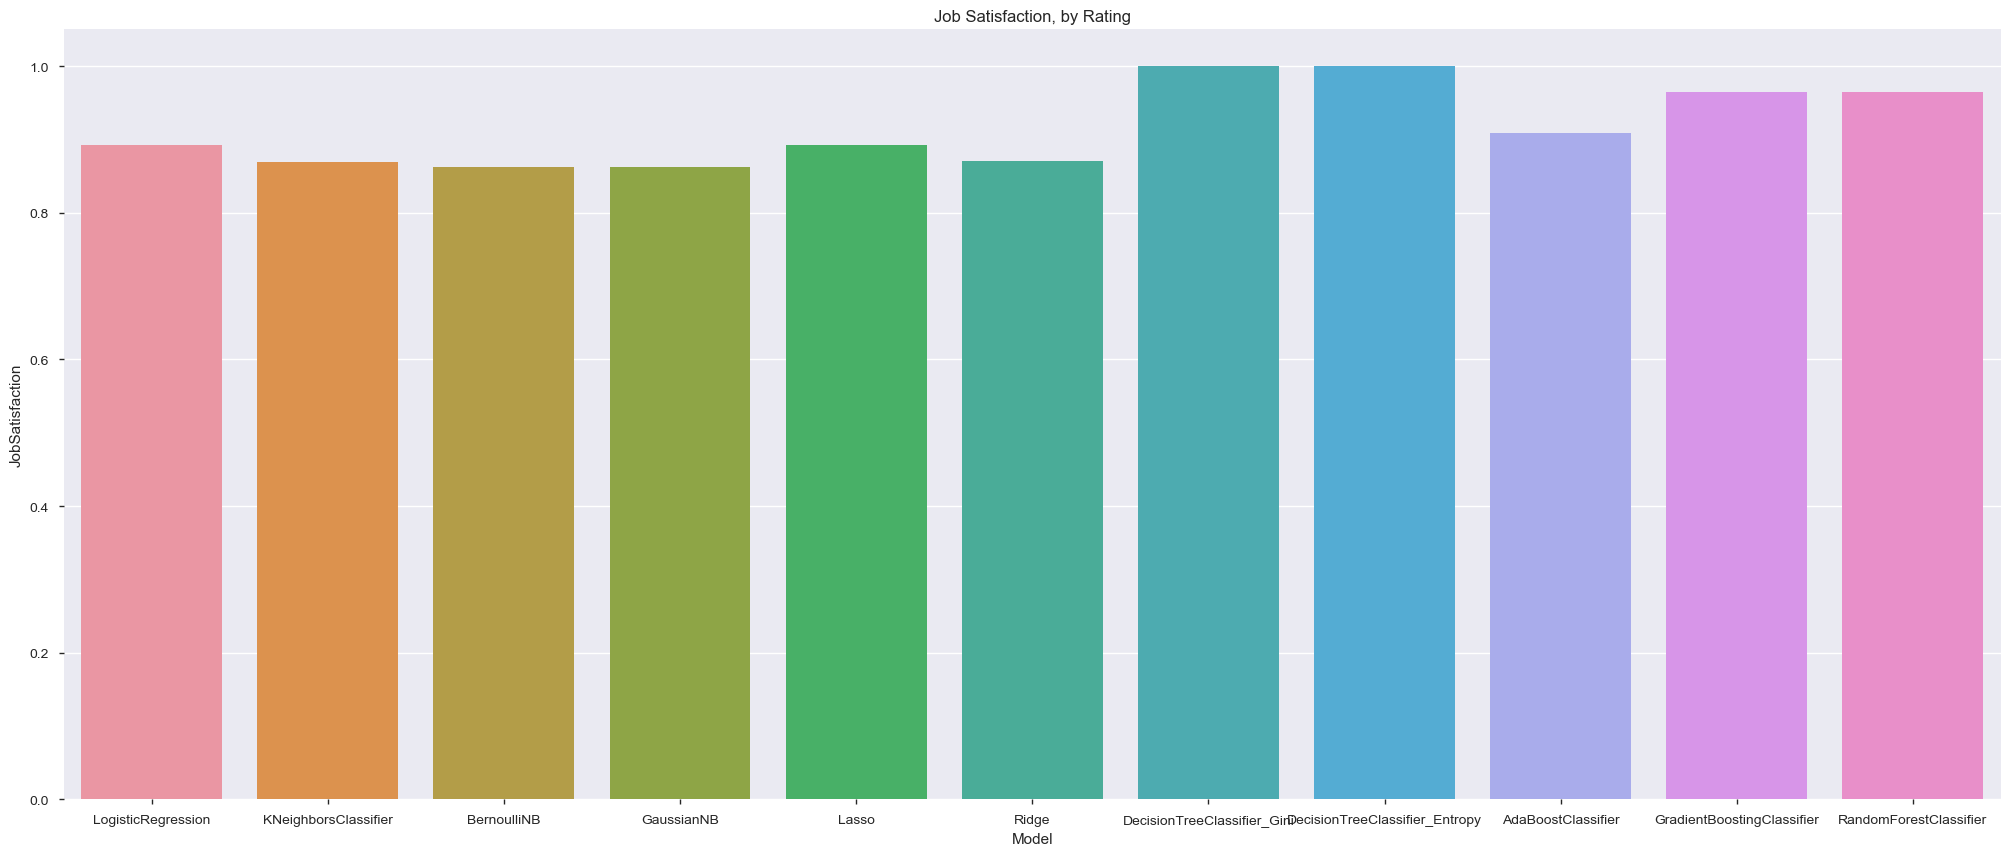

In [96]:
plt.figure(figsize=(25,10))
plt.title("Job Satisfaction, by Rating")
sns.barplot(x=Final_Result['Model'], y=Final_Result['Train_Accuracy'])

plt.ylabel("JobSatisfaction")